<a href="https://colab.research.google.com/github/Raafat-Nagy/Deep-Learning-Projects/blob/main/AutoEncoder/Simple_AutoEncoder_For_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Autoencoder For MNIST Using TensorFlow



In [1]:
import tensorflow as tf

print(tf.__version__)

2.18.0


## Load & Preprocess Data

In [2]:
from tensorflow.keras.datasets import mnist

# Load MNIST data (ignore the labels)
(x_train, _), (x_test, _) = mnist.load_data()
x_train.shape, x_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [3]:
# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

##  Visualize Sample Images

In [5]:
import matplotlib.pyplot as plt

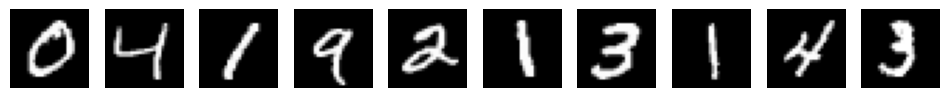

In [6]:
n = 10
plt.figure(figsize=(12, 5))
for i in range(1, n + 1):
    # Original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

## Build the Autoencoder Model

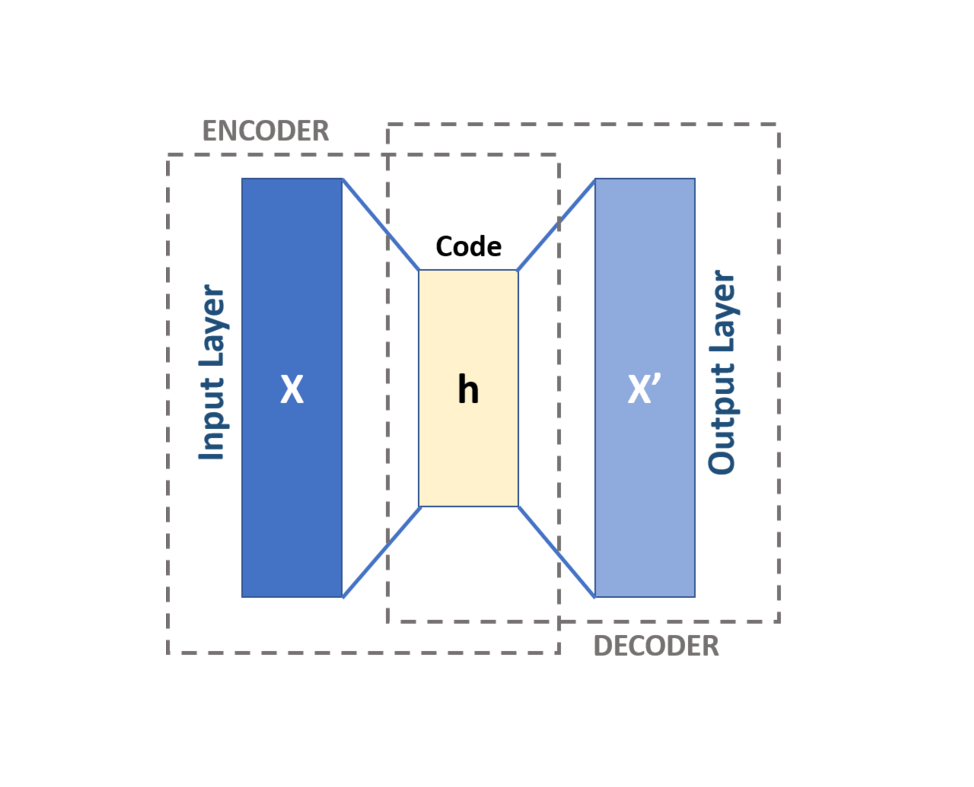

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_dim = x_train.shape[1]  # 784
encoding_dim = 32  # compressed representation

# Encoder
input_img = Input(shape=(input_dim,), name="Input")
encoded = Dense(encoding_dim, activation='relu', name='Bottleneck')(input_img)

# Decoder
decoded = Dense(input_dim, activation='sigmoid', name="Output")(encoded)

In [8]:
# Autoencoder model
autoencoder = Model(input_img, decoded, name="Autoencoder")
autoencoder.summary()

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bottleneck (Dense)              │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Encoder model
encoder = Model(input_img, encoded, name="Encoder")
encoder.summary()

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bottleneck (Dense)              │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Decoder model
encoded_input = Input(shape=(encoding_dim,), name = 'Encoded_Input')
decoder_layer = autoencoder.layers[-1](encoded_input)

decoder = Model(encoded_input, decoder_layer, name="Decoder")
decoder.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Encoded_Input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Autoencoder Model

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Train AutoEncoder

In [12]:
# Note we use x_train as both input and target
history  = autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
    )

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3813 - val_loss: 0.1933
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1815 - val_loss: 0.1525
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1480 - val_loss: 0.1330
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1310 - val_loss: 0.1213
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1207 - val_loss: 0.1134
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1133 - val_loss: 0.1075
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1074 - val_loss: 0.1031
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1033 - val_loss: 0.0996
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1002 - val_loss: 0.0973
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0979 - val_loss: 0.0956
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0964 - val_loss: 0.0946
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

## Plot Training and Validation Loss

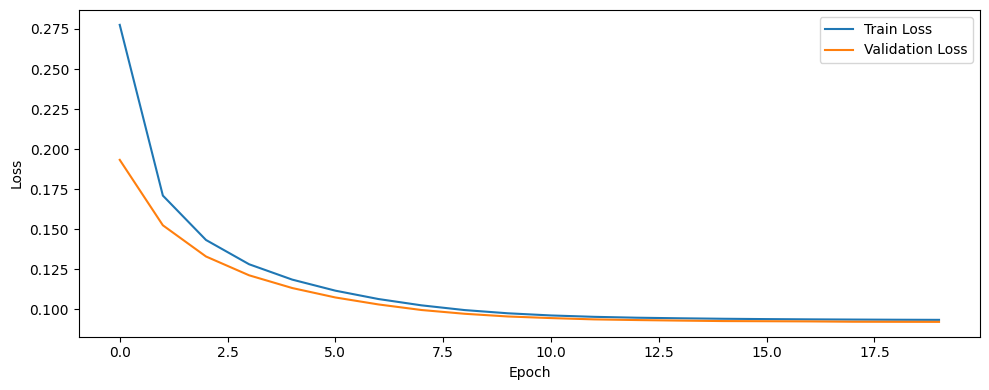

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()

## Encode & Decode Test Images

In [14]:
# Option 1: Encode then decode
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
# Option 2: Directly use autoencoder
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Visualize Original vs. Reconstructed Images


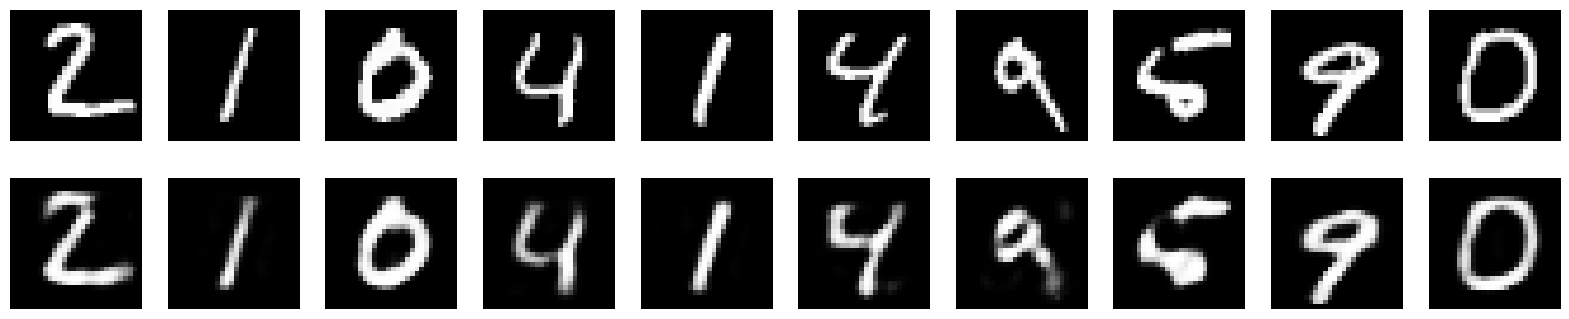

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

---